<a href="https://colab.research.google.com/github/p1kalys/ML-projects/blob/main/Image_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.01 ms (started: 2021-06-20 05:56:35 +00:00)


In [2]:
!pip install bing-image-downloader

time: 3.05 s (started: 2021-06-20 05:56:38 +00:00)


In [3]:
!mkdir images

time: 116 ms (started: 2021-06-20 05:56:41 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("tennisball",limit=50,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/tennisball


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://i.ebayimg.com/images/g/xLgAAOSw0fNc1n3c/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/5/55/Tennisball.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ebayimg.com/images/g/5FUAAOSwNZxckrGk/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ebayimg.com/images/g/iP4AAOSw01pdH57G/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/8/8c/Tennisball2.png
[%] File Downloaded !

[%] Downloading Image #6 from https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Tennisball.JPG/1200px-Tennisball.JPG
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ebayimg.com/images/g/1~wAAOSw3lRfWKb-/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://i.ebayimg.com

In [5]:
downloader.download("car",limit=50,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/car


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://www.carbodydesign.com/archive/2009/08/05-sv-9-competizione-images/SV-9-Competizione-4-lg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://jaikrishnaamaruti.com/uploads/truevalue_cars/0_27-01-2018_16-03-53.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.carthrottle.com/workspace/uploads/posts/2017/12/0fcad9c9368abebdbfb8aaf0211bf96b.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.imcdb.org/i324246.jpg
[Error]Invalid image, not saving http://www.imcdb.org/i324246.jpg

[!] Issue getting: http://www.imcdb.org/i324246.jpg
[!] Error:: Invalid image, not saving http://www.imcdb.org/i324246.jpg

[%] Downloading Image #4 from https://cdn-news.warriortrading.com/wp-content/uploads/2017/02/19182100/TRUE-Logo.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://jaikrishnaamaruti.com/upload

In [7]:
import os 
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR = "/content/images"
CATEGORIES = ['tennisball','car']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)  

time: 28.5 s (started: 2021-06-20 05:59:25 +00:00)


In [8]:
len(flat_data[0])

67500

time: 6.26 ms (started: 2021-06-20 05:59:58 +00:00)


In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 6.63 ms (started: 2021-06-20 05:59:59 +00:00)


In [10]:
unique,count = np.unique(target,return_counts=True)

time: 1.13 ms (started: 2021-06-20 06:00:02 +00:00)


<BarContainer object of 2 artists>

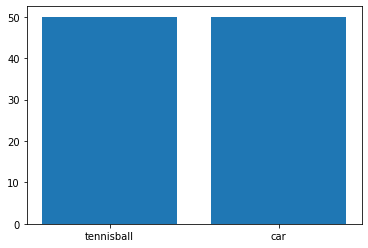

time: 165 ms (started: 2021-06-20 06:00:06 +00:00)


In [11]:
plt.bar(CATEGORIES,count)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target)

time: 228 ms (started: 2021-06-20 06:00:11 +00:00)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

time: 89.2 ms (started: 2021-06-20 06:00:12 +00:00)


In [14]:
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 8s (started: 2021-06-20 06:00:15 +00:00)


In [15]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0])

time: 197 ms (started: 2021-06-20 06:02:24 +00:00)


In [16]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0])

time: 4.46 ms (started: 2021-06-20 06:02:24 +00:00)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.84

time: 8.14 ms (started: 2021-06-20 06:02:31 +00:00)


In [18]:
confusion_matrix(y_pred,y_test)

array([[10,  1],
       [ 3, 11]])

time: 6.63 ms (started: 2021-06-20 06:02:34 +00:00)


In [19]:
import pickle 

time: 1.01 ms (started: 2021-06-20 06:02:40 +00:00)


In [20]:
pickle.dump(clf,open('img_model.p','wb'))

time: 43.1 ms (started: 2021-06-20 06:02:42 +00:00)


In [21]:
model = pickle.load(open('img_model.p','rb'))

time: 22.9 ms (started: 2021-06-20 06:02:44 +00:00)


Enter your URLhttps://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
(427, 640, 3)
PREDICTED OUTPUT: car


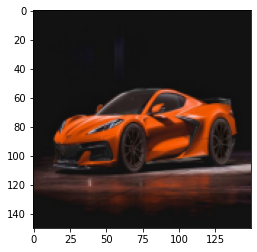

time: 3.76 s (started: 2021-06-20 06:05:38 +00:00)


In [24]:
flat_data=[]
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')